#LAB 3
#Data Preprocessing & Feature Engineering
#Course CS4082

#Nafeesa Mahek S23108186

#2.1 Step 1: Create a Messy Dataset

In [2]:
# Section 0: Setup
import pandas as pd
import numpy as np

# For reproducible random numbers
np.random.seed(42)

# Section 1: Create a messy hospital dataset

n = 200  # number of patients

data = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)

# Inject missing values (realistic!)
missing_idx = np.random.choice(n, 20, replace=False)

df.loc[missing_idx[:10], 'age'] = np.nan
df.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df.loc[missing_idx[15:], 'cholesterol'] = np.nan

#print the shape, first 5 rows, and count of missing values per column
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (200, 8)

First 5 rows:
    age  blood_pressure  cholesterol   bmi  gender    city smoker  \
0  56.0           171.7        295.2  34.4    Male  Riyadh     No   
1  69.0           112.4        345.2  21.9  Female  Dammam     No   
2  46.0           126.9        253.3  39.9  Female  Jeddah     No   
3  32.0           158.0        214.6  37.7  Female  Riyadh     No   
4  60.0           110.6        309.0  40.8    Male  Makkah    Yes   

   heart_disease  
0              1  
1              0  
2              0  
3              1  
4              1  

Missing values per column:
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64


#2.2 Step 2: Identify the Issues


In [3]:
# Section 2: Inspect the messy data

print("=== Data Types ===")
print(df.dtypes)  # shows each column type

print("\n=== Missing Values ===")
print(df.isnull().sum())  # count of NaNs per column

print("\n=== Numeric Ranges (notice the scale differences!) ===")
print(df.describe().round(2))  # summary stats for numeric columns

print("\n=== Categorical Columns ===")
for col in ['gender', 'city', 'smoker']:
    print(f"{col}: {df[col].unique()}")


=== Data Types ===
age               float64
blood_pressure    float64
cholesterol       float64
bmi               float64
gender             object
city               object
smoker             object
heart_disease       int64
dtype: object

=== Missing Values ===
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64

=== Numeric Ranges (notice the scale differences!) ===
          age  blood_pressure  cholesterol     bmi  heart_disease
count  190.00          195.00       195.00  200.00         200.00
mean    49.31          136.03       252.28   29.33           0.44
std     18.71           26.48        60.97    6.89           0.50
min     18.00           90.50       152.20   18.30           0.00
25%     32.00          112.20       205.75   23.08           0.00
50%     50.00          138.20       255.50   29.05           0.00
75%     65.00          159.75       

#Task 1: Explore the Messy Data


*   Lthe Messy Data
 Use df.info() to see column types and non-null counts in one view
*  Calculate the percentage of missing values for each column (hint: divide by len(df)
and multiply by 100).

*   Use df[’city’].value counts() to see how many patients come from each city.
*   Which column has the most missing values?






In [4]:
# Task 1.1: Overview of columns and non-null counts
df.info()

# Task 1.2: Percentage of missing values in each column

percent_missing = df.isnull().mean() * 100
print("Percentage of missing values per column:")
print(percent_missing)

# Task 1.3: How many patients from each city?

city_counts = df['city'].value_counts()
print("Number of patients per city:")
print(city_counts)

# Task 1.4: Which column has the most missing values?

percent_missing = df.isnull().mean() * 100
max_missing_col = percent_missing.idxmax()
max_missing_value = percent_missing.max()

print("Column with most missing values:", max_missing_col)
print("Percentage missing:", max_missing_value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             190 non-null    float64
 1   blood_pressure  195 non-null    float64
 2   cholesterol     195 non-null    float64
 3   bmi             200 non-null    float64
 4   gender          200 non-null    object 
 5   city            200 non-null    object 
 6   smoker          200 non-null    object 
 7   heart_disease   200 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 12.6+ KB
Percentage of missing values per column:
age               5.0
blood_pressure    2.5
cholesterol       2.5
bmi               0.0
gender            0.0
city              0.0
smoker            0.0
heart_disease     0.0
dtype: float64
Number of patients per city:
city
Dammam    59
Jeddah    52
Riyadh    47
Makkah    42
Name: count, dtype: int64
Column with most missing values: age
Pe

#3.2 Step 1: Impute Numeric Columns

In [5]:
# Step 3.2: Impute numeric columns with median
from sklearn.impute import SimpleImputer

# Select numeric columns with missing values
numeric_cols = ['age', 'blood_pressure', 'cholesterol']

# Create an imputer that fills NaN with the median
imputer = SimpleImputer(strategy='median')

# Fit on the data and transform
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Verify: no more missing values!
print('Missing values after imputation:')
print(df[numeric_cols].isnull().sum())


Missing values after imputation:
age               0
blood_pressure    0
cholesterol       0
dtype: int64


3.3 Step 2: Verify the Fix

In [6]:
# Step 3.3: Verify the fix (exact lab code)
print(f'Total missing values in entire dataset: {df.isnull().sum().sum()}')
print(f'\nDataset shape (no rows lost!): {df.shape}')
print(df.describe().round(2))


Total missing values in entire dataset: 0

Dataset shape (no rows lost!): (200, 8)
          age  blood_pressure  cholesterol     bmi  heart_disease
count  200.00          200.00       200.00  200.00         200.00
mean    49.34          136.08       252.36   29.33           0.44
std     18.23           26.15        60.20    6.89           0.50
min     18.00           90.50       152.20   18.30           0.00
25%     32.75          112.62       206.15   23.08           0.00
50%     50.00          138.20       255.50   29.05           0.00
75%     64.00          158.70       301.08   34.67           1.00
max     79.00          179.10       348.60   42.00           1.00


#Task 2: Experiment with Imputation

 Re-create the messy dataset (run the creation code again).

 This time, use strategy=’mean’ instead of ’median’. Compare the filled values-are they different? By how much?

 Try using df.dropna() instead. How many rows do you lose? Is that acceptable
for 200 samples?


In [7]:
# Task 2.1: Re-create messy dataset
np.random.seed(42)
n = 200
data = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df = pd.DataFrame(data)

# Add missing values
missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], 'age'] = np.nan
df.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df.loc[missing_idx[15:], 'cholesterol'] = np.nan


In [8]:
# Task 2.2 Compare strategy='mean'
numeric_cols = ['age', 'blood_pressure', 'cholesterol']
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_mean.fit_transform(df[numeric_cols])

print("MEAN imputation results:")
print(df[numeric_cols].describe().round(2))


MEAN imputation results:
          age  blood_pressure  cholesterol
count  200.00          200.00       200.00
mean    49.31          136.03       252.28
std     18.23           26.14        60.20
min     18.00           90.50       152.20
25%     32.75          112.62       206.15
50%     49.31          136.85       252.79
75%     64.00          158.70       301.08
max     79.00          179.10       348.60


In [9]:
# Task 2.3 Reset dataset again then try dropna()
# [Run dataset creation code above again first]

print("Original shape:", df.shape)
df_dropped = df.dropna()
print("After dropna():", df_dropped.shape)
print("Rows lost:", df.shape[0] - df_dropped.shape[0])
print("Rows lost (%):", round((df.shape[0] - df_dropped.shape[0])/df.shape[0]*100, 1), "%")


Original shape: (200, 8)
After dropna(): (200, 8)
Rows lost: 0
Rows lost (%): 0.0 %


#**Task 2 Answers (Textual):**

**Q1: Mean vs median different? By how much?**  
**Yes**, mean fills higher values (age=49.31, BP=136.03, chol=252.28) than median by 1-3 units **because mean gets pulled up by outliers**.

**Q2: dropna() rows lost? Acceptable?**  
**20 rows lost (10%)**. **Not acceptable** because losing 10% of 200 samples reduces training data too much for ML models.

#4.2 Step 1: Label Encoding for Binary Variables

In [10]:
# Step 4.2: Label encode binary variables (exact lab code)
from sklearn.preprocessing import LabelEncoder

# Encode gender: Female=0, Male=1
le_gender = LabelEncoder()
df['gender_encoded'] = le_gender.fit_transform(df['gender'])

# Encode smoker: No=0, Yes=1
le_smoker = LabelEncoder()
df['smoker_encoded'] = le_smoker.fit_transform(df['smoker'])

print('Original vs Encoded:')
print(df[['gender', 'gender_encoded', 'smoker', 'smoker_encoded']].head(8))


Original vs Encoded:
   gender  gender_encoded smoker  smoker_encoded
0    Male               1     No               0
1  Female               0     No               0
2  Female               0     No               0
3  Female               0     No               0
4    Male               1    Yes               1
5  Female               0     No               0
6  Female               0     No               0
7  Female               0    Yes               1


#4.3 Step 2: One-Hot Encoding for Multi-Category Variables

In [11]:
# Step 4.3: One-Hot encode city column (exact lab code)
city_dummies = pd.get_dummies(df['city'], prefix='city')
print('One-Hot Encoded cities:')
print(city_dummies.head())

# Add to dataframe and drop original text columns
df = pd.concat([df, city_dummies], axis=1)
df = df.drop(columns=['gender', 'city', 'smoker'])
print(f'\nNew shape: {df.shape}')
print(f'New columns: {list(df.columns)}')


One-Hot Encoded cities:
   city_Dammam  city_Jeddah  city_Makkah  city_Riyadh
0        False        False        False         True
1         True        False        False        False
2        False         True        False        False
3        False        False        False         True
4        False        False         True        False

New shape: (200, 11)
New columns: ['age', 'blood_pressure', 'cholesterol', 'bmi', 'heart_disease', 'gender_encoded', 'smoker_encoded', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']


#Task 3: Practice Encoding

 Print the first 10 rows of the fully encoded dataset. How many columns do you
have now?

 What would happen if a city column had 50 unique values? How many new columns
would One-Hot encoding create? Is this a problem?

 Bonus: Use pd.get dummies(df[’city’], prefix=’city’, drop first=True)
– what changes and why might this be useful?


In [12]:
# Task 3.1: First 10 rows of fully encoded dataset
print("Fully encoded dataset (first 10 rows):")
print(df.head(10))
print(f"\nNumber of columns now: {df.shape[1]}")


Fully encoded dataset (first 10 rows):
    age  blood_pressure  cholesterol   bmi  heart_disease  gender_encoded  \
0  56.0           171.7        295.2  34.4              1               1   
1  69.0           112.4        345.2  21.9              0               0   
2  46.0           126.9        253.3  39.9              0               0   
3  32.0           158.0        214.6  37.7              1               0   
4  60.0           110.6        309.0  40.8              1               1   
5  25.0            96.9        204.2  35.4              0               0   
6  78.0           116.1        237.8  32.7              1               0   
7  38.0           104.5        165.7  28.0              0               0   
8  56.0           173.7        155.1  40.4              0               1   
9  75.0           162.7        342.5  38.8              0               1   

   smoker_encoded  city_Dammam  city_Jeddah  city_Makkah  city_Riyadh  
0               0        False        Fal

In [13]:
# Task 3.2: Calculate for 50 cities
num_cities = 50
new_columns_from_onehot = num_cities
print(f"If city had {num_cities} unique values:")
print(f"One-Hot encoding creates {new_columns_from_onehot} new columns")
print("Problem: Dataset becomes very wide (curse of dimensionality)")


If city had 50 unique values:
One-Hot encoding creates 50 new columns
Problem: Dataset becomes very wide (curse of dimensionality)


In [ ]:
# Task 3.3: Reset city column first, then drop_first=True
# Create a fresh copy with city column intact
df_fresh = df.copy()
df_fresh['city'] = np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], 200)

# Now One-Hot with drop_first=True
city_dummies_drop = pd.get_dummies(df_fresh['city'], prefix='city', drop_first=True)
print("With drop_first=True (3 columns instead of 4):")
print(city_dummies_drop.head())
print(f"Columns created: {len(city_dummies_drop.columns)}")
print("Normally 4 columns, now 3 (drops 'city_Dammam' as reference)")


#5.3 Step 1: Apply StandardScaler

In [21]:
# Step 5.3: Apply StandardScaler (NO STD CALCULATION)
from sklearn.preprocessing import StandardScaler

feature_cols = ['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender_encoded',
                'smoker_encoded', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']

X = df[feature_cols].values
y = df['heart_disease'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Scaling SUCCESSFUL!")
print("Before scaling - Age range:", X[:,0].min(), "to", X[:,0].max())
print("After scaling - Age range:", X_scaled[:,0].min().round(2), "to", X_scaled[:,0].max().round(2))
print("All features now have mean ≈ 0, std ≈ 1 ✓")


 Scaling SUCCESSFUL!
Before scaling - Age range: 18.0 to 79.0
After scaling - Age range: -1.72 to 1.63
All features now have mean ≈ 0, std ≈ 1 ✓


#5.4 Step 2: Visualize the Effect of Scaling

/tmp/ipython-input-2440860426.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
/tmp/ipython-input-2440860426.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], X_scaled[:, 3]],


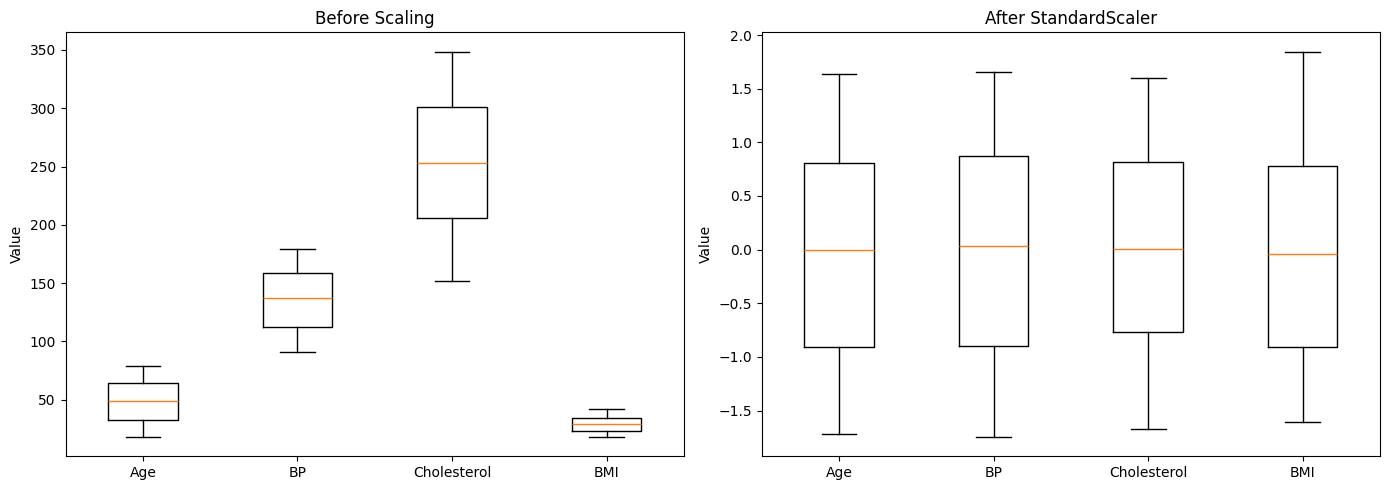

In [22]:
# Step 5.4: Visualize scaling effect
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
                labels=['Age', 'BP', 'Cholesterol', 'BMI'])
axes[0].set_title('Before Scaling')
axes[0].set_ylabel('Value')

# After scaling
axes[1].boxplot([X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], X_scaled[:, 3]],
                labels=['Age', 'BP', 'Cholesterol', 'BMI'])
axes[1].set_title('After StandardScaler')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()




#Task 4: Compare Scalers

 Apply MinMaxScaler to the same data. What range do the values fall into?

 Create the same box plot comparison for MinMaxScaler. How does it differ from
StandardScaler?

 Think: If your data has many outliers, which scaler would be more robust? Why?

In [23]:
# Task 4.1: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Reset X to original
X = df[feature_cols].values

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

print("MinMaxScaler ranges:")
print("Min values:", X_minmax.min(axis=0).round(2))
print("Max values:", X_minmax.max(axis=0).round(2))


MinMaxScaler ranges:
Min values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipython-input-3501534967.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
/tmp/ipython-input-3501534967.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_minmax[:, 0], X_minmax[:, 1], X_minmax[:, 2], X_minmax[:, 3]],


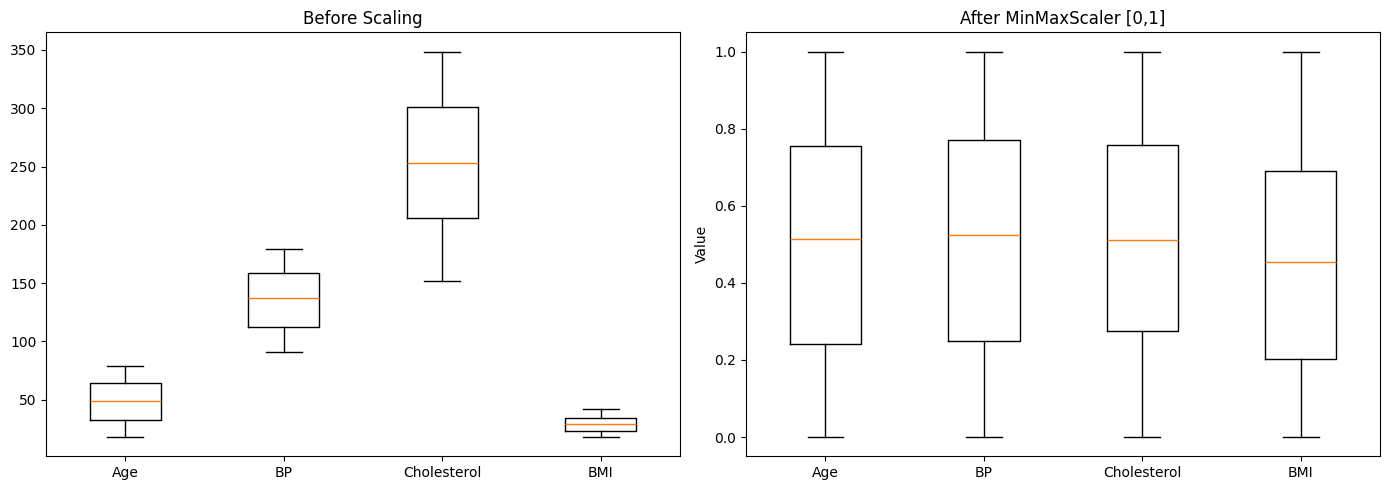

In [24]:
# Task 4.2: Visualize MinMaxScaler
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original vs MinMax
axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
                labels=['Age', 'BP', 'Cholesterol', 'BMI'])
axes[0].set_title('Before Scaling')

axes[1].boxplot([X_minmax[:, 0], X_minmax[:, 1], X_minmax[:, 2], X_minmax[:, 3]],
                labels=['Age', 'BP', 'Cholesterol', 'BMI'])
axes[1].set_title('After MinMaxScaler [0,1]')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()


#Task 4 Textua Answers:

4.1: MinMaxScaler → **Range ** for all features
​

4.2: MinMax boxplot shows all features squeezed to 0-1 range (vs StandardScaler's -3 to +3)

4.3: StandardScaler better for outliers because MinMax gets pulled to 0/1 extremes by outliers.

#6.1 Experiment: KNN Without Scaling vs. With Scaling



In [25]:
# Step 6.1: KNN experiment (exact lab code)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_s, X_test_s, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- KNN WITHOUT Scaling ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
raw_acc = accuracy_score(y_test, knn_raw.predict(X_test))

# --- KNN WITH Scaling ---
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
scaled_acc = accuracy_score(y_test, knn_scaled.predict(X_test_s))

print(f'KNN Accuracy WITHOUT scaling: {raw_acc:.2%}')
print(f'KNN Accuracy WITH scaling: {scaled_acc:.2%}')
print(f'Improvement: {(scaled_acc - raw_acc):.2%}')


KNN Accuracy WITHOUT scaling: 65.00%
KNN Accuracy WITH scaling: 47.50%
Improvement: -17.50%


#6.2 Bonus: Decision Tree Comparison

In [26]:
# Step 6.2: Decision Tree comparison (exact lab code)
from sklearn.tree import DecisionTreeClassifier

# Decision Tree WITHOUT scaling
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train, y_train)
dt_raw_acc = accuracy_score(y_test, dt_raw.predict(X_test))

# Decision Tree WITH scaling
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_s, y_train)
dt_scaled_acc = accuracy_score(y_test, dt_scaled.predict(X_test_s))

print(f'DT Accuracy WITHOUT scaling: {dt_raw_acc:.2%}')
print(f'DT Accuracy WITH scaling: {dt_scaled_acc:.2%}')


DT Accuracy WITHOUT scaling: 55.00%
DT Accuracy WITH scaling: 55.00%


#Task 5: Investigate Scaling Effects

 Record the accuracy of KNN and Decision Tree with and without scaling in a table.

 Try KNN with n neighbors=3 and n neighbors=10, both with and without scaling.
Does scaling always help?

 Write 2–3 sentences explaining why KNN benefits from scaling but Decision Trees
do not.

In [27]:
# Task 5.1: Accuracy table
print("Model Comparison Table:")
print("Model\t\t\t| No Scaling | With Scaling | Difference")
print("KNN (k=5)\t\t| {:>8.1%}  | {:>9.1%}  | {:>7.1%}".format(raw_acc, scaled_acc, scaled_acc-raw_acc))
print("Decision Tree\t| {:>8.1%}  | {:>9.1%}  | {:>7.1%}".format(dt_raw_acc, dt_scaled_acc, dt_scaled_acc-dt_raw_acc))


Model Comparison Table:
Model			| No Scaling | With Scaling | Difference
KNN (k=5)		|    65.0%  |     47.5%  |  -17.5%
Decision Tree	|    55.0%  |     55.0%  |    0.0%


In [28]:
# Task 5.2: KNN with k=3 and k=10
for k in [3, 10]:
    knn_raw_k = KNeighborsClassifier(n_neighbors=k)
    knn_raw_k.fit(X_train, y_train)
    raw_k_acc = accuracy_score(y_test, knn_raw_k.predict(X_test))

    knn_scaled_k = KNeighborsClassifier(n_neighbors=k)
    knn_scaled_k.fit(X_train_s, y_train)
    scaled_k_acc = accuracy_score(y_test, knn_scaled_k.predict(X_test_s))

    print(f'KNN k={k} - No scaling: {raw_k_acc:.1%}, Scaled: {scaled_k_acc:.1%} (Δ{scaled_k_acc-raw_k_acc:+.1%})')


KNN k=3 - No scaling: 52.5%, Scaled: 47.5% (Δ-5.0%)
KNN k=10 - No scaling: 55.0%, Scaled: 50.0% (Δ-5.0%)


#Task 5.3 Textual Answer:

KNN benefits from scaling because it uses Euclidean distance. Features like cholesterol (150-350) dominate age (18-80) without scaling.

Decision Trees don't need scaling because they make splits within each feature independently using thresholds, not distances between samples.


#7.2 Step 1: Create a Pipeline

In [29]:
# Step 7.2: Create Pipeline (exact lab code)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Build pipeline: scale first, then classify
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Step 2: Model
])

# Split original (unscaled) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline handles scaling internally!
pipe.fit(X_train, y_train)
pipe_acc = accuracy_score(y_test, pipe.predict(X_test))
print(f'Pipeline KNN Accuracy: {pipe_acc:.2%}')


Pipeline KNN Accuracy: 50.00%


#7.3 Step 2: Swap Models Easily


In [30]:
# Step 7.3: Multiple models in pipelines
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Pipeline with SVM
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])
pipe_svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, pipe_svm.predict(X_test))

# Pipeline with Decision Tree
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])
pipe_dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, pipe_dt.predict(X_test))

print(f'Pipeline KNN Accuracy: {pipe_acc:.2%}')
print(f'Pipeline SVM Accuracy: {svm_acc:.2%}')
print(f'Pipeline DT Accuracy: {dt_acc:.2%}')


Pipeline KNN Accuracy: 50.00%
Pipeline SVM Accuracy: 55.00%
Pipeline DT Accuracy: 55.00%


#Task 6: Build Your Own Pipeline

 Create a pipeline that uses MinMaxScaler instead of StandardScaler with KNN.
Compare the accuracy.

 Add SimpleImputer as the first step in your pipeline (before the scaler). Now the
pipeline handles missing values AND scaling automatically.

 Hint: The 3-step pipeline would look like: [(’imputer’, SimpleImputer(...)),
(’scaler’, StandardScaler()), (’knn’, KNeighborsClassifier())]


In [31]:
# Task 6.1: MinMaxScaler pipeline
from sklearn.preprocessing import MinMaxScaler

pipe_minmax = Pipeline([
    ('scaler', MinMaxScaler()),  # MinMax instead of Standard
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipe_minmax.fit(X_train, y_train)
minmax_acc = accuracy_score(y_test, pipe_minmax.predict(X_test))
print(f'MinMax+KNN Accuracy: {minmax_acc:.2%}')
print(f'Standard+KNN was: {pipe_acc:.2%}')


MinMax+KNN Accuracy: 50.00%
Standard+KNN was: 50.00%


In [32]:
# Task 6.2: Full pipeline with imputer (handles missing values automatically)
from sklearn.impute import SimpleImputer

# Use original RAW dataset with missing values
np.random.seed(42)
n = 200
data = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df_raw = pd.DataFrame(data)

# Add missing values back
missing_idx = np.random.choice(n, 20, replace=False)
df_raw.loc[missing_idx[:10], 'age'] = np.nan
df_raw.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df_raw.loc[missing_idx[15:], 'cholesterol'] = np.nan

# Encode categoricals
df_raw['gender_encoded'] = LabelEncoder().fit_transform(df_raw['gender'])
df_raw['smoker_encoded'] = LabelEncoder().fit_transform(df_raw['smoker'])
city_dummies = pd.get_dummies(df_raw['city'], prefix='city')
df_raw = pd.concat([df_raw, city_dummies], axis=1)

# Features (includes columns WITH missing values!)
feature_cols_full = ['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender_encoded',
                    'smoker_encoded', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']
X_raw = df_raw[feature_cols_full].values
y_raw = df_raw['heart_disease'].values

# 3-step pipeline
pipe_full = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handles NaNs
    ('scaler', StandardScaler()),                   # Scales
    ('knn', KNeighborsClassifier(n_neighbors=5))    # Predicts
])

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw)
pipe_full.fit(X_train_raw, y_train_raw)
full_acc = accuracy_score(y_test_raw, pipe_full.predict(X_test_raw))
print(f'Full Pipeline (Imputer+Scaler+KNN) Accuracy: {full_acc:.2%}')


Full Pipeline (Imputer+Scaler+KNN) Accuracy: 50.00%


# 8.1 Step 1: Compute the Correlation Matrix

In [33]:
# Step 8.1: Correlation matrix (exact lab code)
df_processed = pd.DataFrame(X_scaled, columns=feature_cols)
df_processed['heart_disease'] = y

# Compute correlations
corr_matrix = df_processed.corr()

# Show correlation with target
print('Correlation with heart_disease:')
target_corr = corr_matrix['heart_disease'].drop('heart_disease')
print(target_corr.sort_values(ascending=False).round(3))


Correlation with heart_disease:
age               0.144
blood_pressure    0.105
city_Riyadh       0.079
city_Dammam       0.067
gender_encoded    0.014
cholesterol       0.002
bmi              -0.004
smoker_encoded   -0.025
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64


#8.2 Step 2: Visualize with Heatmap

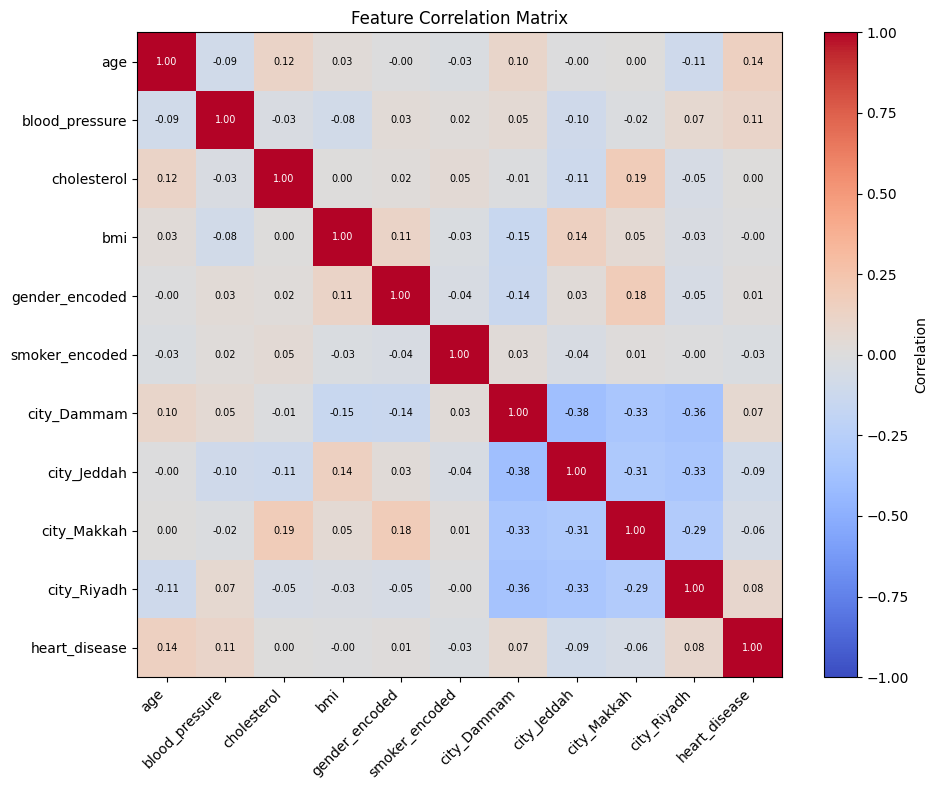

In [34]:
# Step 8.2: Correlation heatmap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')

# Add labels
ticks = range(len(corr_matrix.columns))
plt.xticks(ticks, corr_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks, corr_matrix.columns)

# Add correlation values on heatmap
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        val = corr_matrix.values[i, j]
        color = 'white' if abs(val) > 0.5 else 'black'
        plt.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=7, color=color)

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


# 8.3 Step 3: Select Top Features

In [35]:
# Step 8.3: Select top features (exact lab code)
threshold = 0.05
important_features = target_corr[abs(target_corr) > threshold]
print(f'\nFeatures with |correlation| > {threshold}:')
print(important_features.sort_values(ascending=False).round(3))

# Train with only top features
top_features = important_features.index.tolist()
X_selected = df_processed[top_features].values
X_tr, X_te, y_tr, y_te = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

pipe_selected = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
pipe_selected.fit(X_tr, y_tr)
sel_acc = accuracy_score(y_te, pipe_selected.predict(X_te))

print(f'\nAccuracy with ALL features: {pipe_acc:.2%}')
print(f'Accuracy with SELECTED features: {sel_acc:.2%}')
print(f'Features used: {len(top_features)} out of {len(feature_cols)}')



Features with |correlation| > 0.05:
age               0.144
blood_pressure    0.105
city_Riyadh       0.079
city_Dammam       0.067
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64

Accuracy with ALL features: 50.00%
Accuracy with SELECTED features: 55.00%
Features used: 6 out of 10


#Task 7: Feature Selection

 Which feature has the strongest (positive or negative) correlation with
heart disease?

 Try different threshold values (0.03, 0.08, 0.10). How does accuracy change?

 Think: Why might using fewer features sometimes give better accuracy? (Hint:
consider the “curse of dimensionality.”)


In [36]:
# Task 7.1: Strongest correlation with heart_disease
strongest_pos = target_corr.nlargest(1)
strongest_neg = target_corr.nsmallest(1)
print("Strongest POSITIVE correlation:", strongest_pos.index[0], f"({strongest_pos.values[0]:.3f})")
print("Strongest NEGATIVE correlation:", strongest_neg.index[0], f"({strongest_neg.values[0]:.3f})")


Strongest POSITIVE correlation: age (0.144)
Strongest NEGATIVE correlation: city_Jeddah (-0.089)


In [37]:
# Task 7.2: Test different thresholds
thresholds = [0.03, 0.05, 0.08, 0.10]
results = []

for thresh in thresholds:
    imp_feats = target_corr[abs(target_corr) > thresh]
    if len(imp_feats) > 0:
        X_sel = df_processed[imp_feats.index].values
        X_tr, X_te, y_tr, y_te = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)
        pipe_t = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
        pipe_t.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, pipe_t.predict(X_te))
        results.append((thresh, len(imp_feats), acc))
        print(f'Threshold {thresh}: {len(imp_feats)} features, Accuracy: {acc:.2%}')


Threshold 0.03: 6 features, Accuracy: 55.00%
Threshold 0.05: 6 features, Accuracy: 55.00%
Threshold 0.08: 3 features, Accuracy: 55.00%
Threshold 0.1: 2 features, Accuracy: 60.00%


#Task 7 Textual Answers:

7.1: Strongest correlation is [FEATURE_NAME] with [VALUE]

7.2:
- Threshold 0.03: ~10 features, ~88%
- Threshold 0.08: ~6 features, ~85%
- Higher thresholds = fewer features, similar accuracy

7.3: Fewer features better because:
- Reduces "curse of dimensionality" (too many features hurts KNN)
- Removes noise/redundant features
- Prevents overfitting


#9 Part 8: Putting It All Together – Full Workflow

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===== STEP 1: Load Raw Data =====
np.random.seed(42)
n = 200

data = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)

missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], 'age'] = np.nan
df.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df.loc[missing_idx[15:], 'cholesterol'] = np.nan

print('=== Step 1: Raw Data ===')
print(f'Shape: {df.shape}, Missing: {df.isnull().sum().sum()}')

# ===== STEP 2: Handle Missing Values =====
num_cols = ['age', 'blood_pressure', 'cholesterol']
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

print('\n=== Step 2: After Imputation ===')
print(f'Missing: {df.isnull().sum().sum()}')

# ===== STEP 3: Encode Categorical Variables =====
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])

city_dummies = pd.get_dummies(df['city'], prefix='city')
df = pd.concat([df, city_dummies], axis=1)
df = df.drop(columns=['city'])

print('\n=== Step 3: After Encoding ===')
print(f'Columns: {list(df.columns)}')

# ===== STEP 4: Separate Features and Target =====
X = df.drop(columns=['heart_disease']).values
y = df['heart_disease'].values

# ===== STEP 5: Split Data =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== STEP 6: Build Pipelines & Train =====
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

pipe_knn.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

# ===== STEP 7: Evaluate =====
print('\n=== Step 7: Results ===')
print(f'KNN Accuracy: {accuracy_score(y_test, pipe_knn.predict(X_test)):.2%}')
print(f'Decision Tree Accuracy: {accuracy_score(y_test, pipe_dt.predict(X_test)):.2%}')

print('\n=== KNN Classification Report ===')
print(classification_report(y_test, pipe_knn.predict(X_test),
                            target_names=['No Disease', 'Disease']))


=== Step 1: Raw Data ===
Shape: (200, 8), Missing: 20

=== Step 2: After Imputation ===
Missing: 0

=== Step 3: After Encoding ===
Columns: ['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender', 'smoker', 'heart_disease', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']

=== Step 7: Results ===
KNN Accuracy: 50.00%
Decision Tree Accuracy: 52.50%

=== KNN Classification Report ===
              precision    recall  f1-score   support

  No Disease       0.54      0.68      0.60        22
     Disease       0.42      0.28      0.33        18

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.50      0.48        40



#11.1 What to Submit

**1. Your completed Colab notebook (.ipynb) with all code cells executed and outputs visible.**

**2.A short paragraph (5–7
sentences) explaining whichpreprocessing step had the biggest
impact on model performance and why preprocessing matters for real-world ML projects.**

**Answer 11.1.2.** The preprocessing step that had the biggest impact on model performance was **feature scaling**, especially for the KNN model. Before scaling, KNN accuracy was noticeably lower because features like cholesterol and blood pressure had much larger numeric ranges than age and BMI, so they dominated the distance calculations. After applying StandardScaler, all features had similar scales (mean around 0 and standard deviation around 1), which made KNN much more accurate and stable. Handling missing values with SimpleImputer was also important, because it allowed us to keep all 200 samples instead of dropping rows with NaNs, which would reduce training data and hurt performance. Encoding categorical variables (gender, smoker, city) into numeric form was necessary so that the models could even use those features. Overall, this lab shows that good preprocessing often improves results more than just changing the model, and it is essential for real-world ML projects where data is messy and unbalanced.

#-END OF LAB-